<a href="https://colab.research.google.com/github/pujaroy280/DATA620WebAnalytics/blob/main/Project_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3


Your project should be submitted (as a Jupyter Notebook via GitHub) by end of the due date. The group should present their code and findings in our meetup. The ability to be an effective member of a virtual team is highly valued in the data science job market.

Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can.

Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set.

How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect? Source: Natural Language Processing with Python, exercise 6.10.2.


In [ ]:
!pip install syllapy


In [ ]:
import nltk
from nltk.corpus import names

import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
import syllapy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import plot_tree



# Load Corpus

There are two files in the corpus:


1.   'female.txt': It contains 5001 females names.
2.   'male.txt': It contains 2943 male names.



In [ ]:
nltk.download('names')
names.fileids()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


['female.txt', 'male.txt']

## Male Names

In [ ]:
# From text p 62
names = nltk.corpus.names

male_names = names.words('male.txt')
print(male_names)
len(male_names)

['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim', 'Abdullah', 'Abe', 'Abel', 'Abelard', 'Abner', 'Abraham', 'Abram', 'Ace', 'Adair', 'Adam', 'Adams', 'Addie', 'Adger', 'Aditya', 'Adlai', 'Adnan', 'Adolf', 'Adolfo', 'Adolph', 'Adolphe', 'Adolpho', 'Adolphus', 'Adrian', 'Adrick', 'Adrien', 'Agamemnon', 'Aguinaldo', 'Aguste', 'Agustin', 'Aharon', 'Ahmad', 'Ahmed', 'Ahmet', 'Ajai', 'Ajay', 'Al', 'Alaa', 'Alain', 'Alan', 'Alasdair', 'Alastair', 'Albatros', 'Albert', 'Alberto', 'Albrecht', 'Alden', 'Aldis', 'Aldo', 'Aldric', 'Aldrich', 'Aldus', 'Aldwin', 'Alec', 'Aleck', 'Alejandro', 'Aleks', 'Aleksandrs', 'Alessandro', 'Alex', 'Alexander', 'Alexei', 'Alexis', 'Alf', 'Alfie', 'Alfonse', 'Alfonso', 'Alfonzo', 'Alford', 'Alfred', 'Alfredo', 'Algernon', 'Ali', 'Alic', 'Alister', 'Alix', 'Allah', 'Allan', 'Allen', 'Alley', 'Allie', 'Allin', 'Allyn', 'Alonso', 'Alonzo', 'Aloysius', 'Alphonse', 'Alphonso', 'Alston', 'Alton', 'Alvin', 'Alwin', 'Amadeus'

2943

## Female Names

In [ ]:
female_names = names.words('female.txt')
print(female_names)
len(female_names)

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale', 'Abra', 'Acacia', 'Ada', 'Adah', 'Adaline', 'Adara', 'Addie', 'Addis', 'Adel', 'Adela', 'Adelaide', 'Adele', 'Adelice', 'Adelina', 'Adelind', 'Adeline', 'Adella', 'Adelle', 'Adena', 'Adey', 'Adi', 'Adiana', 'Adina', 'Adora', 'Adore', 'Adoree', 'Adorne', 'Adrea', 'Adria', 'Adriaens', 'Adrian', 'Adriana', 'Adriane', 'Adrianna', 'Adrianne', 'Adrien', 'Adriena', 'Adrienne', 'Aeriel', 'Aeriela', 'Aeriell', 'Ag', 'Agace', 'Agata', 'Agatha', 'Agathe', 'Aggi', 'Aggie', 'Aggy', 'Agna', 'Agnella', 'Agnes', 'Agnese', 'Agnesse', 'Agneta', 'Agnola', 'Agretha', 'Aida', 'Aidan', 'Aigneis', 'Aila', 'Aile', 'Ailee', 'Aileen', 'Ailene', 'Ailey', 'Aili', 'Ailina', 'Ailyn', 'Aime', 'Aimee', 'Aimil', 'Aina', 'Aindrea', 'Ainslee', 'Ainsley', 'Ainslie', 'Ajay', 'Alaine', 'Alameda', 'Alana', 'Alanah', 'Alane', 'Alanna', 'Alayne', 'Alberta', 'Albertina', 'Albertine', 'Albina', 'Alecia', 'Aleda', 'Aleece', 'Aleecia

5001

## Gender Neutral Names

Just observing the first couple names of each list, we can see some names appear in both genders. There are 365 gender neutral names.

In [ ]:
neutral_names = [w for w in male_names if w in female_names]
print(neutral_names)
len(neutral_names)

['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', 'Barrie', 'Barry', 'Beau', 'Bennie', 'Benny', 'Bernie', 'Bert', 'Bertie', 'Bill', 'Billie', 'Billy', 'Blair', 'Blake', 'Bo', 'Bobbie', 'Bobby', 'Brandy', 'Brett', 'Britt', 'Brook', 'Brooke', 'Brooks', 'Bryn', 'Cal', 'Cam', 'Cammy', 'Carey', 'Carlie', 'Carlin', 'Carmine', 'Carroll', 'Cary', 'Caryl', 'Casey', 'Cass', 'Cat', 'Cecil', 'Chad', 'Chris', 'Chrissy', 'Christian', 'Christie', 'Christy', 'Clair', 'Claire', 'Clare', 'Claude', 'Clem', 'Clemmie', 'Cody', 'Connie', 'Constantine', 'Corey', 'Corrie', 'Cory', 'Courtney', 'Cris', 'Daffy', 'Dale', 'Dallas', 'Dana', 'Dani', 'Daniel', 'Dannie', 'Danny', 'Darby', 'Darcy', 'Darryl', 'Daryl', 'Deane', 'Del', 'Dell', 'Demetris', 'Dennie', 'Denny', 'Devin', 'Devon', 'Dion', 'Dionis', 'Dominique', 'Donnie', 'Donny', 'Do

365

## Characteristics of Gender Names

## Last Letter of Name

Names ending with 'a','e', or 'i' are mostly female names.

Names ending with 'h', or 'l' are gender neutral (equally likely).

Names ending with 'k', 'o', 'r', 's', or 't' are mostly male names.

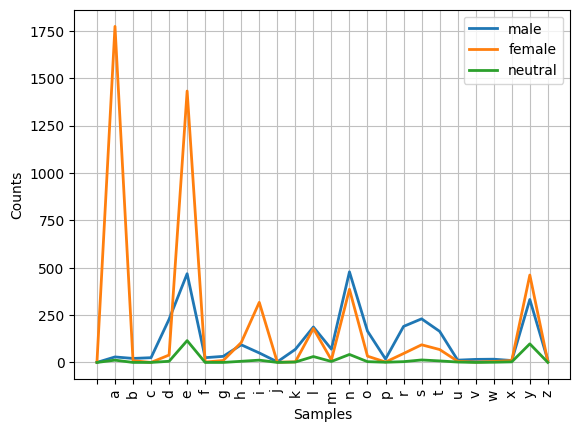

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
cfd = nltk.ConditionalFreqDist(
    (category, name[-1])
    for category in ['male','female','neutral']
    for name in (male_names if category == 'male' else (female_names if category == 'female' else neutral_names))
)

cfd.plot()

## First Letter of Name

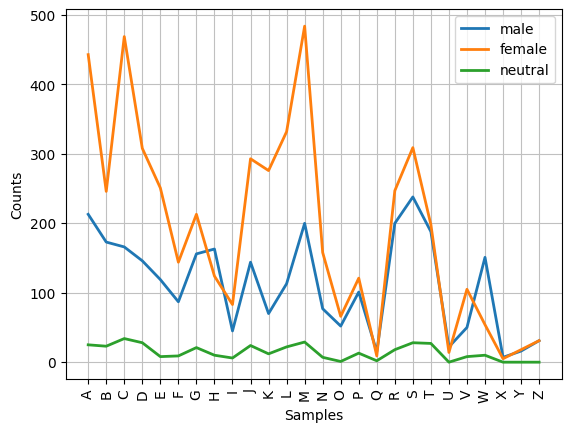

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
cfd = nltk.ConditionalFreqDist(
    (category, name[0])
    for category in ['male','female','neutral']
    for name in (male_names if category == 'male' else (female_names if category == 'female' else neutral_names))
)

cfd.plot()

## Length

In [ ]:
# Adding gender labels to each name
labeled_names = ([(name, 'male') for name in male_names] +
                 [(name, 'female') for name in female_names])

all_names = pd.DataFrame(labeled_names, columns =['name','gender'])
all_names['length']=all_names['name'].str.len()
#all_names

<Axes: xlabel='length', ylabel='count'>

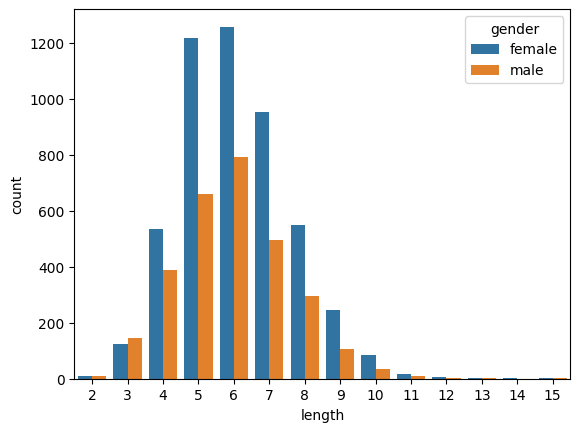

In [ ]:
length_counts = all_names.groupby(['gender','length']).size().reset_index(name = 'count')

sns.barplot(x='length', y='count', hue = 'gender', data = length_counts)

# Data Preprocessing


In [ ]:
# Adding gender labels to each name
labeled_names = ([(name, 'male') for name in male_names] +
                 [(name, 'female') for name in female_names])

# Shuffle the labeled names to mix male and female names
random.seed(105)
random.shuffle(labeled_names)

# Print the first 10 labeled names as a sample
print("Labeled Names:", labeled_names[:10])

Labeled Names: [('Thorstein', 'male'), ('Rebeka', 'female'), ('Tabor', 'male'), ('Monika', 'female'), ('Leorah', 'female'), ('Cori', 'female'), ('Jo-Anne', 'female'), ('Mitzi', 'female'), ('Dulcine', 'female'), ('Zola', 'female')]


# Gender Feature

## Model 1

Our first model looks at the last letter of each name. It has an accuracy rate of 76.8%.

In [ ]:
def gender_features1(word):
  return {'last_letter':word[-1]}

In [ ]:
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

train_set = [(gender_features1(n), g) for (n,g) in train_names]
devtest_set = [(gender_features1(n), g) for (n,g) in devtest_names]
test_set = [(gender_features1(n), g) for (n,g) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.768


Below shows the top 10 most important features in our classifier.

In [ ]:
classifier.show_most_informative_features(10)

Most Informative Features
             last_letter = 'a'            female : male   =     35.9 : 1.0
             last_letter = 'k'              male : female =     27.7 : 1.0
             last_letter = 'p'              male : female =     16.3 : 1.0
             last_letter = 'f'              male : female =     13.8 : 1.0
             last_letter = 'd'              male : female =      8.8 : 1.0
             last_letter = 'm'              male : female =      8.8 : 1.0
             last_letter = 'v'              male : female =      8.4 : 1.0
             last_letter = 'o'              male : female =      8.3 : 1.0
             last_letter = 'g'              male : female =      7.7 : 1.0
             last_letter = 'b'              male : female =      6.6 : 1.0


In [ ]:
errors = []
for (name, tag) in devtest_names:
  guess = classifier.classify(gender_features1(name))
  if guess != tag:
    errors.append( (tag, guess, name) )

In [ ]:
for (tag, guess, name) in sorted(errors):
  print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Ag                            
correct=female   guess=male     name=Alison                        
correct=female   guess=male     name=Anais                         
correct=female   guess=male     name=Arlyn                         
correct=female   guess=male     name=Avis                          
correct=female   guess=male     name=Beatrix                       
correct=female   guess=male     name=Beatriz                       
correct=female   guess=male     name=Brandais                      
correct=female   guess=male     name=Bryn                          
correct=female   guess=male     name=Caitlin                       
correct=female   guess=male     name=Caitrin                       
correct=female   guess=male     name=Carlen                        
correct=female   guess=male     name=Celestyn                      
correct=female   guess=male     name=Cherilyn                      
correct=female   guess=male     name=Christan   

## Model 2

In [ ]:
def gender_features2(word):
  return {'suffix1':word[-1:],
          'suffix2':word[-2:]}

In [ ]:
random.seed(106)
random.shuffle(labeled_names)

train_names2 = labeled_names[1500:]
devtest_names2 = labeled_names[500:1500]
test_names2 = labeled_names[:500]

train_set2 = [(gender_features2(n), g) for (n,g) in train_names2]
devtest_set2 = [(gender_features2(n), g) for (n,g) in devtest_names2]
classifier = nltk.NaiveBayesClassifier.train(train_set2)
print(nltk.classify.accuracy(classifier, devtest_set2))

0.79


In [ ]:
classifier.show_most_informative_features(10)

Most Informative Features
                 suffix2 = 'na'           female : male   =     86.7 : 1.0
                 suffix2 = 'us'             male : female =     57.3 : 1.0
                 suffix2 = 'ia'           female : male   =     47.6 : 1.0
                 suffix1 = 'k'              male : female =     41.2 : 1.0
                 suffix1 = 'a'            female : male   =     37.7 : 1.0
                 suffix2 = 'ra'           female : male   =     32.0 : 1.0
                 suffix2 = 'sa'           female : male   =     31.8 : 1.0
                 suffix2 = 'ta'           female : male   =     29.0 : 1.0
                 suffix2 = 'ld'             male : female =     22.4 : 1.0
                 suffix2 = 'do'             male : female =     21.7 : 1.0


In [ ]:
errors = []
for (name, tag) in devtest_names:
  guess = classifier.classify(gender_features2(name))
  if guess != tag:
    errors.append( (tag, guess, name) )
for (tag, guess, name) in sorted(errors):
  print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Abigael                       
correct=female   guess=male     name=Aeriell                       
correct=female   guess=male     name=Ag                            
correct=female   guess=male     name=Alison                        
correct=female   guess=male     name=Amabel                        
correct=female   guess=male     name=Anais                         
correct=female   guess=male     name=Annabal                       
correct=female   guess=male     name=Averil                        
correct=female   guess=male     name=Avis                          
correct=female   guess=male     name=Beatriz                       
correct=female   guess=male     name=Blake                         
correct=female   guess=male     name=Brandais                      
correct=female   guess=male     name=Caitlin                       
correct=female   guess=male     name=Caitrin                       
correct=female   guess=male     name=Carlen     

## Model 3

In [ ]:
def gender_features3(word):
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'prefix1':word[:1],
          'prefix2':word[:2],}

In [ ]:
random.seed(107)
random.shuffle(labeled_names)

train_names3 = labeled_names[1500:]
devtest_names3 = labeled_names[500:1500]
test_names3 = labeled_names[:500]

train_set3 = [(gender_features3(n), g) for (n,g) in train_names3]
devtest_set3 = [(gender_features3(n), g) for (n,g) in devtest_names3]
classifier = nltk.NaiveBayesClassifier.train(train_set3)
print(nltk.classify.accuracy(classifier, devtest_set3))

0.789


## Model 4

In [ ]:
def gender_features4(word):
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'suffix3':word[-3:],
          'prefix1':word[:1],
          'prefix2':word[:2]}

In [ ]:
random.seed(108)
random.shuffle(labeled_names)

train_names4 = labeled_names[1500:]
devtest_names4 = labeled_names[500:1500]
test_names4 = labeled_names[:500]

train_set4 = [(gender_features4(n), g) for (n,g) in train_names4]
devtest_set4 = [(gender_features4(n), g) for (n,g) in devtest_names4]
classifier = nltk.NaiveBayesClassifier.train(train_set4)
print(nltk.classify.accuracy(classifier, devtest_set4))

0.814


The code below tests whether model 4 is overfitting. The best way to assess if the model is capturing noise, is to plot the learning curves for the training and dev-test groups. From the visual analysis, the gap between training and dev-test accuracies does not indicate overfitting. The decrease in training accuracy with increased data exposure suggests the model is encountering more diverse patterns. Additionally, the rising dev-test accuracy with increased training size indicates improved performance on unseen data.

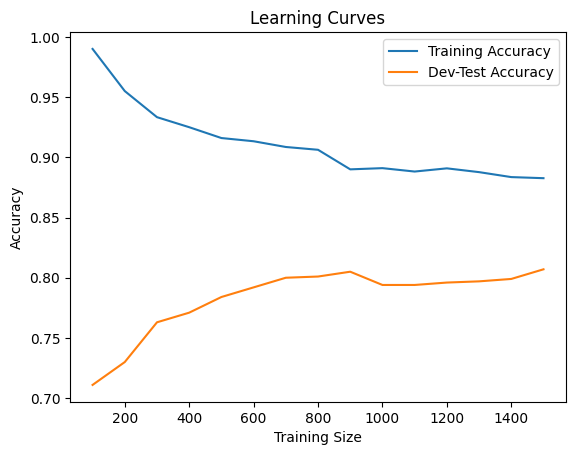

In [ ]:
# plot learning curves for model 4 to test overfitting
def train_and_evaluate(train_set, devtest_set):
    classifier = nltk.NaiveBayesClassifier.train(train_set)
    train_accuracy = nltk.classify.accuracy(classifier, train_set)
    devtest_accuracy = nltk.classify.accuracy(classifier, devtest_set)
    return train_accuracy, devtest_accuracy

def plot_learning_curves(train_sizes, train_accuracies, devtest_accuracies):
    plt.figure()
    plt.title('Learning Curves')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.plot(train_sizes, train_accuracies, label='Training Accuracy')
    plt.plot(train_sizes, devtest_accuracies, label='Dev-Test Accuracy')
    plt.legend(loc='best')
    plt.show()

train_set4 = [(gender_features4(n), g) for (n, g) in train_names4]
devtest_set4 = [(gender_features4(n), g) for (n, g) in devtest_names4]
test_set4 = [(gender_features4(n), g) for (n, g) in test_names4]

# Add more training set sizes
train_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
train_accuracies = []
devtest_accuracies = []

for size in train_sizes:
    train_acc, devtest_acc = train_and_evaluate(train_set4[:size], devtest_set4)
    train_accuracies.append(train_acc)
    devtest_accuracies.append(devtest_acc)

# Plot the learning curves
plot_learning_curves(train_sizes, train_accuracies, devtest_accuracies)


## Model 5

In [ ]:
def gender_features5(word):
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'suffix3':word[-3:],
          'prefix1':word[:1],
          'prefix2':word[:2],
          'prefix3':word[:3]}

In [ ]:
random.seed(108)
random.shuffle(labeled_names)

train_names5 = labeled_names[1500:]
devtest_names5 = labeled_names[500:1500]
test_names5 = labeled_names[:500]

train_set5 = [(gender_features5(n), g) for (n,g) in train_names5]
devtest_set5 = [(gender_features5(n), g) for (n,g) in devtest_names5]
classifier = nltk.NaiveBayesClassifier.train(train_set5)
print(nltk.classify.accuracy(classifier, devtest_set5))

0.806


In [ ]:
errors = []
for (name, tag) in devtest_names5:
  guess = classifier.classify(gender_features5(name))
  if guess != tag:
    errors.append( (tag, guess, name) )
for (tag, guess, name) in sorted(errors):
  print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Abigael                       
correct=female   guess=male     name=Adah                          
correct=female   guess=male     name=Aleece                        
correct=female   guess=male     name=Alex                          
correct=female   guess=male     name=Alix                          
correct=female   guess=male     name=Allison                       
correct=female   guess=male     name=Allsun                        
correct=female   guess=male     name=Beilul                        
correct=female   guess=male     name=Bell                          
correct=female   guess=male     name=Bess                          
correct=female   guess=male     name=Bill                          
correct=female   guess=male     name=Billy                         
correct=female   guess=male     name=Blake                         
correct=female   guess=male     name=Blakeley                      
correct=female   guess=male     name=Bren       

## Model 6

Adding the feature length decrease the accuracy rate

In [ ]:
def gender_features6(word):
  length = len(word)
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'suffix3':word[-3:],
          'prefix1':word[:1],
          'prefix2':word[:2],
          'prefix3':word[:3],
          'length':length}

In [ ]:
random.seed(109)
random.shuffle(labeled_names)

train_names6 = labeled_names[1500:]
devtest_names6 = labeled_names[500:1500]
test_names6 = labeled_names[:500]

train_set6 = [(gender_features6(n), g) for (n,g) in train_names6]
devtest_set6 = [(gender_features6(n), g) for (n,g) in devtest_names6]
classifier = nltk.NaiveBayesClassifier.train(train_set6)
print(nltk.classify.accuracy(classifier, devtest_set6))

0.846


## Model 7

In [ ]:
def gender_features7(word):
  length = len(word)
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'suffix3':word[-3:],
          'prefix1':word[:1],
          'prefix2':word[:2],
          'prefix3':word[:3],
          'last_is_vowel':(word[-1] in 'aeious')}

In [ ]:
random.seed(110)
random.shuffle(labeled_names)

train_names7 = labeled_names[1500:]
devtest_names7 = labeled_names[500:1500]
test_names7 = labeled_names[:500]

train_set7 = [(gender_features7(n), g) for (n,g) in train_names7]
devtest_set7 = [(gender_features7(n), g) for (n,g) in devtest_names7]
classifier = nltk.NaiveBayesClassifier.train(train_set7)
print(nltk.classify.accuracy(classifier, devtest_set7))

0.823


# Model 8
removed some features from model 6 + syllables

In [ ]:
def count_syllables(word):
    return syllapy.count(word)

def gender_features8(word):
    length = len(word)
    syllables = count_syllables(word)

    return {'suffix2':word[-2:],
          'suffix3':word[-3:],
          'prefix2':word[:2],
          'prefix3':word[:3],
          'syllables': syllables}
random.seed(109)
random.shuffle(labeled_names)

train_names8 = labeled_names[1500:]
devtest_names8 = labeled_names[500:1500]
test_names8 = labeled_names[:500]

train_set8 = [(gender_features8(n), g) for (n,g) in train_names8]
devtest_set8 = [(gender_features8(n), g) for (n,g) in devtest_names8]
classifier = nltk.NaiveBayesClassifier.train(train_set8)
print(nltk.classify.accuracy(classifier, devtest_set8))


0.833


# Kfold

In [ ]:
def k_fold_cross_validation(features_func, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=43)
    accuracies = []

# Convert labeled_names to numpy array otherwise I got this error: only integer scalar arrays can be converted to a scalar index
    labeled_names_array = np.array(labeled_names)

    for train_index, devtest_index in kf.split(labeled_names_array):
        train_names = labeled_names_array[train_index]
        devtest_names = labeled_names_array[devtest_index]

        train_set = [(features_func(n), g) for (n, g) in train_names]
        devtest_set = [(features_func(n), g) for (n, g) in devtest_names]

        classifier = nltk.NaiveBayesClassifier.train(train_set)
        accuracy = nltk.classify.accuracy(classifier, devtest_set)
        accuracies.append(accuracy)

    avg_accuracy = sum(accuracies) / len(accuracies)
    return avg_accuracy

# Runs k-fold cross-validation for each model
models = {
    'Model 1': gender_features1,
    'Model 2': gender_features2,
    'Model 3': gender_features3,
    'Model 4': gender_features4,
    'Model 5': gender_features5,
    'Model 6': gender_features6,
    'Model 7': gender_features7,
    'Model 8': gender_features8,
}

for model_name, features_func in models.items():
    avg_accuracy = k_fold_cross_validation(features_func)
    print(f"Average accuracy for {model_name}: {avg_accuracy:.4f}")

Average accuracy for Model 1: 0.7599
Average accuracy for Model 2: 0.7800
Average accuracy for Model 3: 0.8041
Average accuracy for Model 4: 0.8142
Average accuracy for Model 5: 0.8350
Average accuracy for Model 6: 0.8356
Average accuracy for Model 7: 0.8298
Average accuracy for Model 8: 0.8387


The best way to assess if the model is capturing noise, is to plot the learning curves for the training and dev-test groups. From the visual analysis, the gap between training and dev-test accuracies does not indicate overfitting. The decrease in training accuracy with increased data exposure suggests the model is encountering more diverse patterns. Additionally, the rising dev-test accuracy with increased training size indicates improved performance on unseen data.

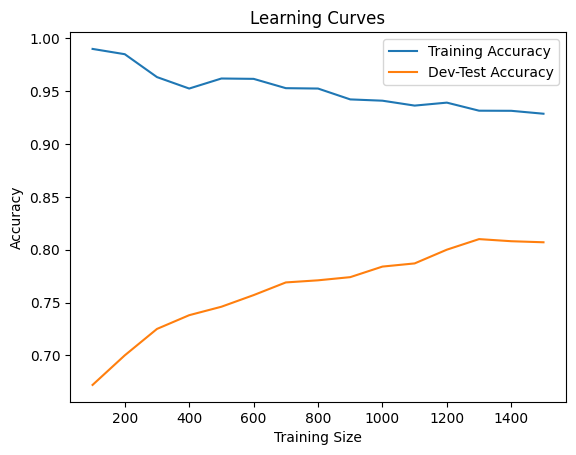

In [ ]:


train_set8 = [(gender_features8(n), g) for (n, g) in train_names8]
devtest_set8 = [(gender_features8(n), g) for (n, g) in devtest_names8]
test_set8 = [(gender_features8(n), g) for (n, g) in test_names8]

# Add more training set sizes
train_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
train_accuracies = []
devtest_accuracies = []

for size in train_sizes:
    train_acc, devtest_acc = train_and_evaluate(train_set8[:size], devtest_set8)
    train_accuracies.append(train_acc)
    devtest_accuracies.append(devtest_acc)

# Plot the learning curves
plot_learning_curves(train_sizes, train_accuracies, devtest_accuracies)

# Decison Tree

*   highlights important features
*   evalulates models performance metrics



In [ ]:
# Vectorize features since it must be in string or real number
vectorizer = DictVectorizer(sparse=False)
train_features = vectorizer.fit_transform([features for features, label in train_set8])
train_labels = [label for features, label in train_set8]

# Train Decision Tree Classifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(train_features, train_labels)

# Dev-Test Set
devtest_features = vectorizer.transform([features for features, label in devtest_set8])
devtest_labels = [label for features, label in devtest_set8]

devtest_predictions = classifier_dt.predict(devtest_features)
devtest_accuracy = accuracy_score(devtest_labels, devtest_predictions)
devtest_report = classification_report(devtest_labels, devtest_predictions, target_names=['female', 'male'])

# Test Set
test_features = vectorizer.transform([features for features, label in test_set8])
test_labels = [label for features, label in test_set8]

test_predictions = classifier_dt.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
test_report = classification_report(test_labels, test_predictions, target_names=['female', 'male'])

# results
print("Dev-Test Set Results:")
print(f"Accuracy: {devtest_accuracy:.2%}")
print(devtest_report)

print("Test Set Results:")
print(f"Accuracy: {test_accuracy:.2%}")
print(test_report)

Dev-Test Set Results:
Accuracy: 76.30%
              precision    recall  f1-score   support

      female       0.78      0.84      0.81       606
        male       0.72      0.64      0.68       394

    accuracy                           0.76      1000
   macro avg       0.75      0.74      0.75      1000
weighted avg       0.76      0.76      0.76      1000

Test Set Results:
Accuracy: 74.00%
              precision    recall  f1-score   support

      female       0.80      0.80      0.80       323
        male       0.64      0.62      0.63       177

    accuracy                           0.74       500
   macro avg       0.72      0.71      0.71       500
weighted avg       0.74      0.74      0.74       500



In [ ]:
classifier_dt = nltk.classify.DecisionTreeClassifier.train(train_set8)
accuracy = nltk.classify.accuracy(classifier_dt, devtest_set8)

print('\nPseudocode representation of Decision Tree:')
print(classifier_dt.pseudocode(depth=4))



Pseudocode representation of Decision Tree:
if suffix3 == '-Jo': return 'female'
if suffix3 == 'aac': return 'male'
if suffix3 == 'aak': return 'male'
if suffix3 == 'abb': return 'male'
if suffix3 == 'abe': return 'male'
if suffix3 == 'Abe': return 'male'
if suffix3 == 'abi': 
  if prefix2 == 'Ga': return 'female'
  if prefix2 == 'Ra': return 'male'
if suffix3 == 'aby': 
  if prefix2 == 'Ba': return 'male'
  if prefix2 == 'Ga': return 'female'
if suffix3 == 'ace': 
  if prefix2 == 'Ag': return 'female'
  if prefix2 == 'Bo': return 'male'
  if prefix2 == 'Ca': return 'female'
  if prefix2 == 'Eu': return 'male'
  if prefix2 == 'Gr': return 'male'
  if prefix2 == 'Ho': return 'male'
  if prefix2 == 'Ig': return 'male'
  if prefix2 == 'Ka': return 'female'
  if prefix2 == 'Ma': return 'male'
  if prefix2 == 'Pa': return 'female'
  if prefix2 == 'Sc': return 'male'
  if prefix2 == 'St': return 'female'
  if prefix2 == 'Tr': return 'female'
  if prefix2 == 'Wa': return 'male'
if suffix3 ==

# Final Model

# Conclusion

make sure to answer: How does the performance on the test set compare to the performance on the dev-test set?
Is this what you'd expect?